# KGG220 Surveying 2 : Precise Heighting Pratical - Non-simultaneous Reciprocal Trig Heighting

Created By: Jordan Rattle

Date: 18/08/22






### Start up
We start with importing the required python packages and then reading in a csv file containing the field data.

In [71]:
from  numpy import *
from  matplotlib.pyplot import *
import pandas as pd

vsub = pd.read_csv("/Users/Jordanius/Desktop/UTAS/KGG220 - Surveying 2/vsubtense.csv")
vsub

,Mark,L1,L3,L4,L2,Z1,Z3,Z4,Z2,Station
0,SS16,1.82,1.62,1.22,1.02,88-53-24,89-59-8,90-31-50,91-4-22,1
1,SS17,2.06,1.86,1.46,1.26,88-11-13,89-5-6,90-53-30,91-47-41,1
2,SS18,1.67,1.47,1.07,0.87,88-32-8,89-16-23,90-43-16,91-26-55,2
3,SS22,1.44,1.24,0.84,0.64,86-37-35,88-19-7,91-41-50,93-23-36,3
4,SS22 (2),1.41,1.21,0.81,0.61,86-37-8,88-18-56,91-41-48,93-23-41,3
5,SS23,2.26,2.06,1.66,1.46,87-55-15,88-57-5,91-0-15,92-2-9,4
6,SS12,2.76,2.56,2.16,1.96,86-58-43,88-28-34,91-28-33,92-58-18,5
7,SS15,2.27,2.07,1.67,1.47,89-0-10,89-29-47,90-28-48,90-58-27,5
8,SS16 (2),1.83,1.63,1.23,1.03,88-54-20,89-27-9,90-32-47,91-5-16,6
9,SS17 (2),2.10,1.90,1.50,1.30,88-12-51,89-6-49,90-55-5,91-49-13,6


### Function definitions

Now we will define the required functions to compute the vertical subtense connections.



In [72]:
def dms_radians(dms_string):
    '''Takes an angle in DMS with the form D-M-S and converts it into decimal degrees
    and then uses numpy.radians() to convert to radians. 
       
     
    Parameters
    ----------
    dms_string : a DMS string of the form D-M-S
        
    Returns
    -------
    radians(degrees) : float
           '''
    degrees = sum(fromstring(dms_string, sep = '-') * [1.0, 1/60.0, 1/3600.0])
    return radians(degrees)

def cot(x):
    '''Computes the cotangent of an angle in radians. 
       
     
    Parameters
    ----------
    x : angle in radians 
        
    Returns
    -------
    cot : float
           '''
    cot = round(1/tan(x), 7)
    return cot

def hvertsub(l1, l2, za1, za2):
    '''Computes the vertical subtense of either H1 or H2 in the vertical subtense formula. 
       
     
    Parameters
    ----------
    l1 : represents either l1 or l3 in the vertical subtense formula
    12 : represents either l2 or l4 in the vertical subtense formula
    za1 : l1's associated zenith angle in radians
    za2 : l2's associated zenith angle in radians
        
    Returns
    -------
    h : float
           '''
    hnum = l2*cot(za1) - l1*cot(za2)
    hden = cot(za1) - cot(za2)
    h = hnum/hden
    h = round(h, 3)
    return h

def dhstn(sd, za1, za2):
    '''Computes the change in height between total station set ups. 
       
     
    Parameters
    ----------
    sd : Observed slope distance between station 1 & 2
    za1 : Observed zenith angle in radians from station 1 to 2
    za2 : Observed zenith angle in radians from station 2 to 1
        
    Returns
    -------
    dh : float
           '''
    dh = (sd/2) * (cos(za1) - cos(za2))
    return dh


### Computing height difference between Trunnion axis at station and observed ground mark (Vertical subtense connections)

Having defined our functions, it's now time to create a new column in the DataFrame 'vsub' named "dH vertsub" and then compute the change in height between the trunnion axis at the station and the observed ground mark.

Using the formula:

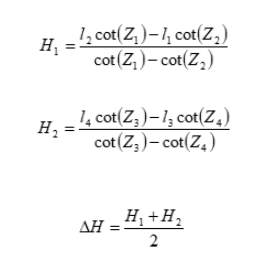


In [73]:
# Create a new column and then copy dataframe
vsub["dH vertsub"] = 0
vsubc = vsub.copy()

# Compute precise height using vertical subtense method and assign the values to the new column
for i in range(len(vsubc)):
    za1 = dms_radians(vsubc.iloc[i][5])
    za2 = dms_radians(vsubc.iloc[i][8])
    za3 = dms_radians(vsubc.iloc[i][6])
    za4 = dms_radians(vsubc.iloc[i][7])
    h1 = hvertsub(vsubc.iloc[i][1], vsubc.iloc[i][4], za1, za2)
    h2 = hvertsub(vsubc.iloc[i][2], vsubc.iloc[i][3], za3, za4)
    dH = (h1 + h2)/2
    dH = round(dH, 3)
    vsubc.loc[i, "dH vertsub"] = dH
    
vsubc[["Mark", "dH vertsub"]]

,Mark,dH vertsub
0,SS16,1.511
1,SS17,1.658
2,SS18,1.268
3,SS22,1.041
4,SS22 (2),1.011
5,SS23,1.856
6,SS12,2.357
7,SS15,1.865
8,SS16 (2),1.430
9,SS17 (2),1.704


### Computing change in height between trunnion axis at adjacent instrument stations

We will now find the change in heights between the trunnion axis at adjacent instrument stations.

Firstly, another csv file will be loaded containting the field data required for this computation.

In [74]:
statdH = pd.read_csv("/Users/Jordanius/Desktop/UTAS/KGG220 - Surveying 2/dH station heights.csv")
statdH

,Stations,ZA (AB),ZA (BA),SD
0,1 & 2,89-25-49,90-34-14,78.080
1,2 & 3,91-42-44,88-17-19,130.830
2,3 & 4,89-56-7,90-4-0,92.014
3,4 & 5,88-01-12,91-59-0,163.070
4,5 & 1,92-31-48,87-28-16,57.424


Now that we have our dataframe set up, we will create a new column, compute the change in height values and then put them in the new column. 

The change in height will be computed using the following formula:

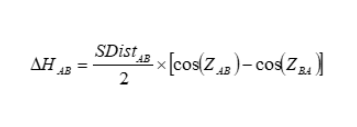

Where:

SDAB = the mean slope distance observation

ZAB = the mean zenith angle observation from point A to B

ZBA = the mean zenith angle observation from point B to A

In [75]:
# Create a new column and then copy dataframe
statdH["dH"] = 0
statdHc = statdH.copy()

# Compute the change in height between stations and assign values to the new column
for i in range(len(statdHc)):
    za1 = dms_radians(statdHc.iloc[i][1])
    za2 = dms_radians(statdHc.iloc[i][2])
    sd = statdHc.iloc[i][3]
    dh = dhstn(sd,za1,za2)
    dh = round(dh,3)
    statdHc.loc[i,"dH"] = dh

statdHc[["Stations","dH"]]

,Stations,dH
0,1 & 2,0.777
1,2 & 3,-3.908
2,3 & 4,0.106
3,4 & 5,5.639
4,5 & 1,-2.534


### Computing Misclosure and Reduced Level (RL) heights from known RL of SS23 (MGA2020)

The next step is to compute the misclosure for the level run and then determine the RLs relative to the MGA2020 datum.

Firstly, the data will be rearranged so that it will begin at SS23 and end at SS22.
After that, required data will be added to a new dataframe.  

In [76]:
# Reorder the statdHc dataframe 
statdHc = statdHc.reindex([3,4,0,1,2])
statdHc = statdHc.rename(index = {3:0, 4:1, 0:2, 1:3, 2:4})
statdHc

,Stations,ZA (AB),ZA (BA),SD,dH
0,4 & 5,88-01-12,91-59-0,163.070,5.639
1,5 & 1,92-31-48,87-28-16,57.424,-2.534
2,1 & 2,89-25-49,90-34-14,78.080,0.777
3,2 & 3,91-42-44,88-17-19,130.830,-3.908
4,3 & 4,89-56-7,90-4-0,92.014,0.106


In [77]:
# Reorder the statdHc dataframe
vsubc = vsubc.reindex(index = [5,6,7,8,9,0,1,2,3,4])
vsubc = vsubc.rename(index = {5:0, 6:1, 7:2, 8:3, 9:4, 0:5, 1:6, 2:7, 3:8, 4:9})

lis = [0,0,0,1,1,1,1,2,3,3]

# Add the change in height between stations to the vsubc dataframe
for i in range(10):
    vsubc.loc[i, "dH stns"] = statdHc.loc[lis[i], "dH"]

vsubc


,Mark,L1,L3,L4,L2,Z1,Z3,Z4,Z2,Station,dH vertsub,dH stns
0,SS23,2.26,2.06,1.66,1.46,87-55-15,88-57-5,91-0-15,92-2-9,4,1.856,5.639
1,SS12,2.76,2.56,2.16,1.96,86-58-43,88-28-34,91-28-33,92-58-18,5,2.357,5.639
2,SS15,2.27,2.07,1.67,1.47,89-0-10,89-29-47,90-28-48,90-58-27,5,1.865,5.639
3,SS16 (2),1.83,1.63,1.23,1.03,88-54-20,89-27-9,90-32-47,91-5-16,6,1.430,-2.534
4,SS17 (2),2.10,1.90,1.50,1.30,88-12-51,89-6-49,90-55-5,91-49-13,6,1.704,-2.534
5,SS16,1.82,1.62,1.22,1.02,88-53-24,89-59-8,90-31-50,91-4-22,1,1.511,-2.534
6,SS17,2.06,1.86,1.46,1.26,88-11-13,89-5-6,90-53-30,91-47-41,1,1.658,-2.534
7,SS18,1.67,1.47,1.07,0.87,88-32-8,89-16-23,90-43-16,91-26-55,2,1.268,0.777
8,SS22,1.44,1.24,0.84,0.64,86-37-35,88-19-7,91-41-50,93-23-36,3,1.041,-3.908
9,SS22 (2),1.41,1.21,0.81,0.61,86-37-8,88-18-56,91-41-48,93-23-41,3,1.011,-3.908


In [78]:
# Create a new dataframe with the required columns from vsubc
RLs = vsubc[["Mark", "Station", "dH vertsub", "dH stns"]]
RLs

,Mark,Station,dH vertsub,dH stns
0,SS23,4,1.856,5.639
1,SS12,5,2.357,5.639
2,SS15,5,1.865,5.639
3,SS16 (2),6,1.430,-2.534
4,SS17 (2),6,1.704,-2.534
5,SS16,1,1.511,-2.534
6,SS17,1,1.658,-2.534
7,SS18,2,1.268,0.777
8,SS22,3,1.041,-3.908
9,SS22 (2),3,1.011,-3.908


### Compute Height above RL
Heights above corresponding RLs will now be computed using the formula:

Let,
Hp = Height of the point above RL

Hpre = the preceding point's height above RL

Htpre = the preceding point's computed vertical subtense height

dHst = the change in height between stations

Ht = the point's computed vertical subtense height


Then we have:

Hp = Hpre + Htpre + dHst - Ht


In [79]:
# Compute height relative to SS23 and assign values to new column
RLsc = RLs.copy()
RLsc["Height above RL"] = 0

for i in range(1,3):
    RLsc.loc[i, "Height above RL"] = RLsc.loc[0, "Height above RL"] + RLsc.loc[0, "dH vertsub"] + RLsc.loc[i, "dH stns"] - RLsc.loc[i, "dH vertsub"]

for i in range(3,7):
    RLsc.loc[i, "Height above RL"] = RLsc.loc[2, "Height above RL"] + RLsc.loc[2, "dH vertsub"] + RLsc.loc[i, "dH stns"] - RLsc.loc[i, "dH vertsub"]

for i in range(7,8):
    RLsc.loc[i, "Height above RL"] = RLsc.loc[6, "Height above RL"] + RLsc.loc[6, "dH vertsub"] + RLsc.loc[i, "dH stns"] - RLsc.loc[i, "dH vertsub"]

for i in range(8,10):
    RLsc.loc[i, "Height above RL"] = RLsc.loc[7, "Height above RL"] + RLsc.loc[7, "dH vertsub"] + RLsc.loc[i, "dH stns"] - RLsc.loc[i, "dH vertsub"]

RLsc
    

,Mark,Station,dH vertsub,dH stns,Height above RL
0,SS23,4,1.856,5.639,0.000
1,SS12,5,2.357,5.639,5.138
2,SS15,5,1.865,5.639,5.630
3,SS16 (2),6,1.430,-2.534,3.531
4,SS17 (2),6,1.704,-2.534,3.257
5,SS16,1,1.511,-2.534,3.450
6,SS17,1,1.658,-2.534,3.303
7,SS18,2,1.268,0.777,4.470
8,SS22,3,1.041,-3.908,0.789
9,SS22 (2),3,1.011,-3.908,0.819


### Computing Misclose

The misclose is computed by subtracting the given initial RL value from the observed RL value.

In [80]:
# Compute misclosure for level run
SS23 = RLsc.loc[9, "Height above RL"] + RLsc.loc[9, "dH vertsub"] + statdHc.loc[4, "dH"] - RLsc.loc[0, "dH vertsub"]
print(f'Misclosure = {round(SS23 - RLsc.loc[0,"Height above RL"],4)} m')

Misclosure = 0.08 m


As can be seen from the results above, the misclosure is far greater than what is acceptable by SP1 standards and, therefore, a new level run should be conducted. However, given the limited time resources, the level run could not be undertaken. The RLs will be adjusted and the misclosure will distributed amongst the RL values as a demonstration of the technique.

In [81]:
# Add SS23 RL to 'Height above RL' column to ascertain calculated RLs
RLsc["RL"] = RLsc["Height above RL"] + 11.4142
RLsc
    

,Mark,Station,dH vertsub,dH stns,Height above RL,RL
0,SS23,4,1.856,5.639,0.000,11.4142
1,SS12,5,2.357,5.639,5.138,16.5522
2,SS15,5,1.865,5.639,5.630,17.0442
3,SS16 (2),6,1.430,-2.534,3.531,14.9452
4,SS17 (2),6,1.704,-2.534,3.257,14.6712
5,SS16,1,1.511,-2.534,3.450,14.8642
6,SS17,1,1.658,-2.534,3.303,14.7172
7,SS18,2,1.268,0.777,4.470,15.8842
8,SS22,3,1.041,-3.908,0.789,12.2032
9,SS22 (2),3,1.011,-3.908,0.819,12.2332


### Determination of RL adjustments and computation of adjusted RLs

The adjustments will be made with the following formula:

Let,

adj = adjustment for each point (will be negative due to the positive misclose)

m = misclose

n = number of observations

i = observation number

then,

adj = -i*m/n

Once the adjustments have been computed, they will be added to the calculated RLs and displayed in a new column with an added SS23 point for completion.

In [82]:
# Add a new adjustments column to dataframe for each RL based on cumulative distribution of misclose (note sign of adjustment)
RLsc["Adj"] = [0, -1*0.08/9, -2*0.08/9, -3*0.08/9, -4*0.08/9, -5*0.08/9, -6*0.08/9, -7*0.08/9, -8*0.08/9, -9*0.08/9]
RLsc

,Mark,Station,dH vertsub,dH stns,Height above RL,RL,Adj
0,SS23,4,1.856,5.639,0.000,11.4142,0.000000
1,SS12,5,2.357,5.639,5.138,16.5522,-0.008889
2,SS15,5,1.865,5.639,5.630,17.0442,-0.017778
3,SS16 (2),6,1.430,-2.534,3.531,14.9452,-0.026667
4,SS17 (2),6,1.704,-2.534,3.257,14.6712,-0.035556
5,SS16,1,1.511,-2.534,3.450,14.8642,-0.044444
6,SS17,1,1.658,-2.534,3.303,14.7172,-0.053333
7,SS18,2,1.268,0.777,4.470,15.8842,-0.062222
8,SS22,3,1.041,-3.908,0.789,12.2032,-0.071111
9,SS22 (2),3,1.011,-3.908,0.819,12.2332,-0.080000


In [83]:
# Add adjustments to computed RLs
RLsc["RL adj"] = RLsc["RL"] + RLsc["Adj"]
RLsc

,Mark,Station,dH vertsub,dH stns,Height above RL,RL,Adj,RL adj
0,SS23,4,1.856,5.639,0.000,11.4142,0.000000,11.414200
1,SS12,5,2.357,5.639,5.138,16.5522,-0.008889,16.543311
2,SS15,5,1.865,5.639,5.630,17.0442,-0.017778,17.026422
3,SS16 (2),6,1.430,-2.534,3.531,14.9452,-0.026667,14.918533
4,SS17 (2),6,1.704,-2.534,3.257,14.6712,-0.035556,14.635644
5,SS16,1,1.511,-2.534,3.450,14.8642,-0.044444,14.819756
6,SS17,1,1.658,-2.534,3.303,14.7172,-0.053333,14.663867
7,SS18,2,1.268,0.777,4.470,15.8842,-0.062222,15.821978
8,SS22,3,1.041,-3.908,0.789,12.2032,-0.071111,12.132089
9,SS22 (2),3,1.011,-3.908,0.819,12.2332,-0.080000,12.153200


In [84]:
# Compute Adjusted misclosure for level run
SS23 = RLsc.loc[9, "RL adj"] + RLsc.loc[9, "dH vertsub"] + statdHc.loc[4, "dH"] - RLsc.loc[0, "dH vertsub"]
print(f'Misclosure = {round(SS23 - RLsc.loc[0,"RL adj"],3)} m')

Misclosure = 0.0 m


After the adjustments, the misclosure has now been distributed and accounted for.

In [85]:
# Add SS23 row to dataframe
RLsc.loc[len(RLsc.index)] = ["SS23 (2)", 4, 1.856, 0.106, 0.08, 11.4942, -0.08, 11.414200]
RLsc

,Mark,Station,dH vertsub,dH stns,Height above RL,RL,Adj,RL adj
0,SS23,4,1.856,5.639,0.000,11.4142,0.000000,11.414200
1,SS12,5,2.357,5.639,5.138,16.5522,-0.008889,16.543311
2,SS15,5,1.865,5.639,5.630,17.0442,-0.017778,17.026422
3,SS16 (2),6,1.430,-2.534,3.531,14.9452,-0.026667,14.918533
4,SS17 (2),6,1.704,-2.534,3.257,14.6712,-0.035556,14.635644
5,SS16,1,1.511,-2.534,3.450,14.8642,-0.044444,14.819756
6,SS17,1,1.658,-2.534,3.303,14.7172,-0.053333,14.663867
7,SS18,2,1.268,0.777,4.470,15.8842,-0.062222,15.821978
8,SS22,3,1.041,-3.908,0.789,12.2032,-0.071111,12.132089
9,SS22 (2),3,1.011,-3.908,0.819,12.2332,-0.080000,12.153200
